# MINI Project 2 -- Epidemic simulation

In [1]:
%load_ext blackcellmagic

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from epidemics import SIR

In [3]:
S, I, R, t = SIR(S0=995, I0=5, R0=0, a=0.0005, b=1 / 7, T=40)

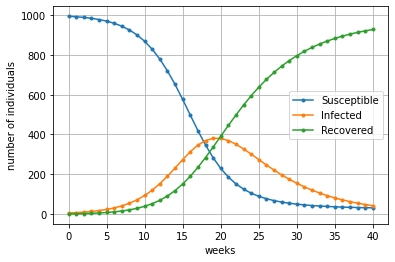

In [4]:
fig, ax = plt.subplots()
ax.plot(t, S, marker=".", linestyle="-", label="Susceptible")
ax.plot(t, I, marker=".", linestyle="-", label="Infected")
ax.plot(t, R, marker=".", linestyle="-", label="Recovered")
ax.set(
    xlabel="weeks", ylabel="number of individuals", title="",
)
ax.legend()
ax.grid()
plt.show()

In [11]:
D = np.diff(R,prepend=0) * 0.9

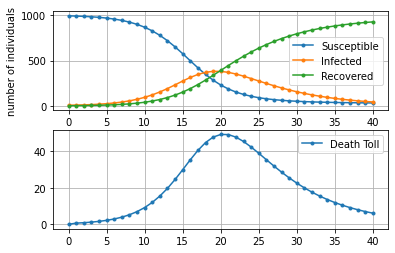

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=2)

ax1.plot(t, S, marker=".", linestyle="-", label="Susceptible")
ax1.plot(t, I, marker=".", linestyle="-", label="Infected")
ax1.plot(t, R, marker=".", linestyle="-", label="Recovered")
ax1.set(
    xlabel="weeks", ylabel="number of individuals", title="",
)
ax1.legend()
ax1.grid()

ax2.plot(t[:len(D)], D, marker=".", linestyle="-", label="Death Toll")
ax2.legend()
ax2.grid()
plt.show()

In [13]:
T = R - np.cumsum(D)

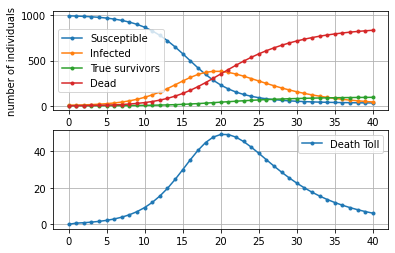

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=2)

ax1.plot(t, S, marker=".", linestyle="-", label="Susceptible")
ax1.plot(t, I, marker=".", linestyle="-", label="Infected")
ax1.plot(t, T, marker=".", linestyle="-", label="True survivors")
ax1.plot(t, np.cumsum(D), marker=".", linestyle="-", label="Dead")
ax1.set(
    xlabel="weeks", ylabel="number of individuals", title="",
)
ax1.legend()
ax1.grid()

ax2.plot(t, D, marker=".", linestyle="-", label="Death Toll")
ax2.legend()
ax2.grid()
plt.show()